In [1]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [2]:
!ls

eval_config_1.yaml  eval.ipynb	evals_1.csv  evals_rb.csv


In [3]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [4]:
csv = pd.read_csv('evals_rb.csv', sep=',')

In [5]:
seq_lens = csv['seq_len'].unique().tolist()
seq_lens

[4096, 8192, 16384, 32768, 65536, 360000]

In [23]:
out_data_wd = {}
out_data_rb = {}
for seq_len in seq_lens:
    sset = csv.loc[csv['dataset'] == 'rev16'].loc[csv['split'] == 'test'].loc[csv['seq_len'] == seq_len]
    wdsset = sset.loc[sset['name'].str.startswith('w')]
    out_data_wd[seq_len] = {'wer': wdsset['wer'].mean()*100, 'std': wdsset['wer'].std()*100}
    rbset = sset.loc[sset['name'].str.startswith('rb')]
    out_data_rb[seq_len] = {'wer': rbset['wer'].mean()*100, 'std': rbset['wer'].std()*100}

In [25]:
out_data_rb

{4096: {'wer': 14.684979495706822, 'std': 0.06479914349690377},
 8192: {'wer': 14.483980219619813, 'std': 0.06036572632968231},
 16384: {'wer': 14.466227584832936, 'std': 0.017557599458324493},
 32768: {'wer': 14.585170237905029, 'std': 0.12590657501035954},
 65536: {'wer': 14.46484682434951, 'std': 0.057336094130569046},
 360000: {'wer': 14.44354366260525, 'std': 0.034550557910859946}}

In [22]:
out_data_rb

{4096: {'wer': 6.516628271014234, 'std': 0.08344598445938176},
 8192: {'wer': 6.406757634827807, 'std': 0.09571565526861074},
 16384: {'wer': 6.372496898812684, 'std': 0.14544238545938923},
 32768: {'wer': 6.2366353594423725, 'std': 0.060286376382177445},
 65536: {'wer': 6.19528619528619, 'std': 0.03683255305835054},
 360000: {'wer': 6.1385787701577135, 'std': 0.09296386353786196}}

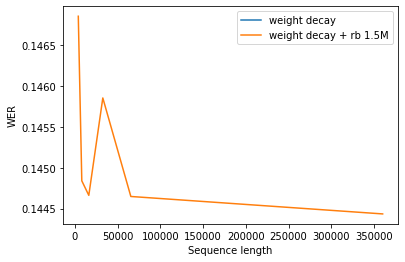

In [12]:
# log scale x axis:

plt.plot(seq_lens, [out_data_wd[seq_len]['wer'] for seq_len in seq_lens], label='weight decay')
plt.plot(seq_lens, [out_data_rb[seq_len]['wer'] for seq_len in seq_lens], label='weight decay + rb 1.5M')
plt.legend()
plt.xlabel('Sequence length')
plt.ylabel('WER')
plt.show()